# Principal Component Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split


data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
X = df.iloc[: ,:13]
y = df['target']

column_names = df.columns
column_names = column_names.to_list()

In [6]:
df.shape

(178, 14)

In [12]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int32
dtype: object

In [14]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [30]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


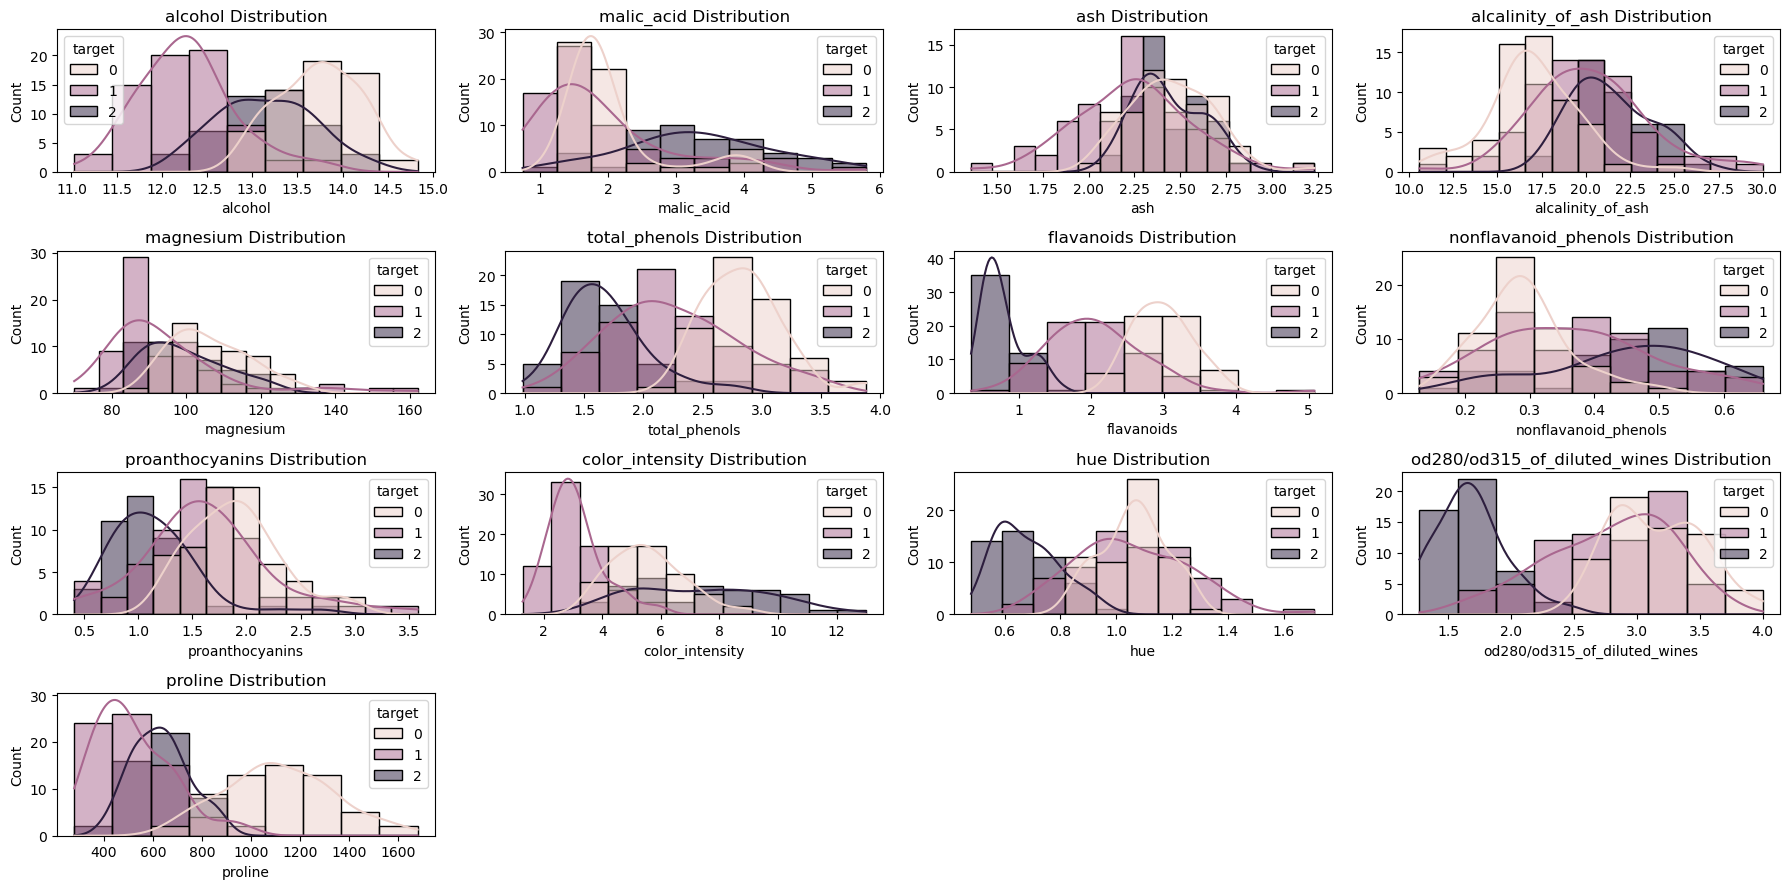

In [5]:
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")
warnings.filterwarnings("ignore", message="is_categorical_dtype is deprecated")

plt.figure(figsize=(18, 9))
for i, feature in enumerate(column_names[:-1]):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data=df, x=feature, hue='target', kde=True)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

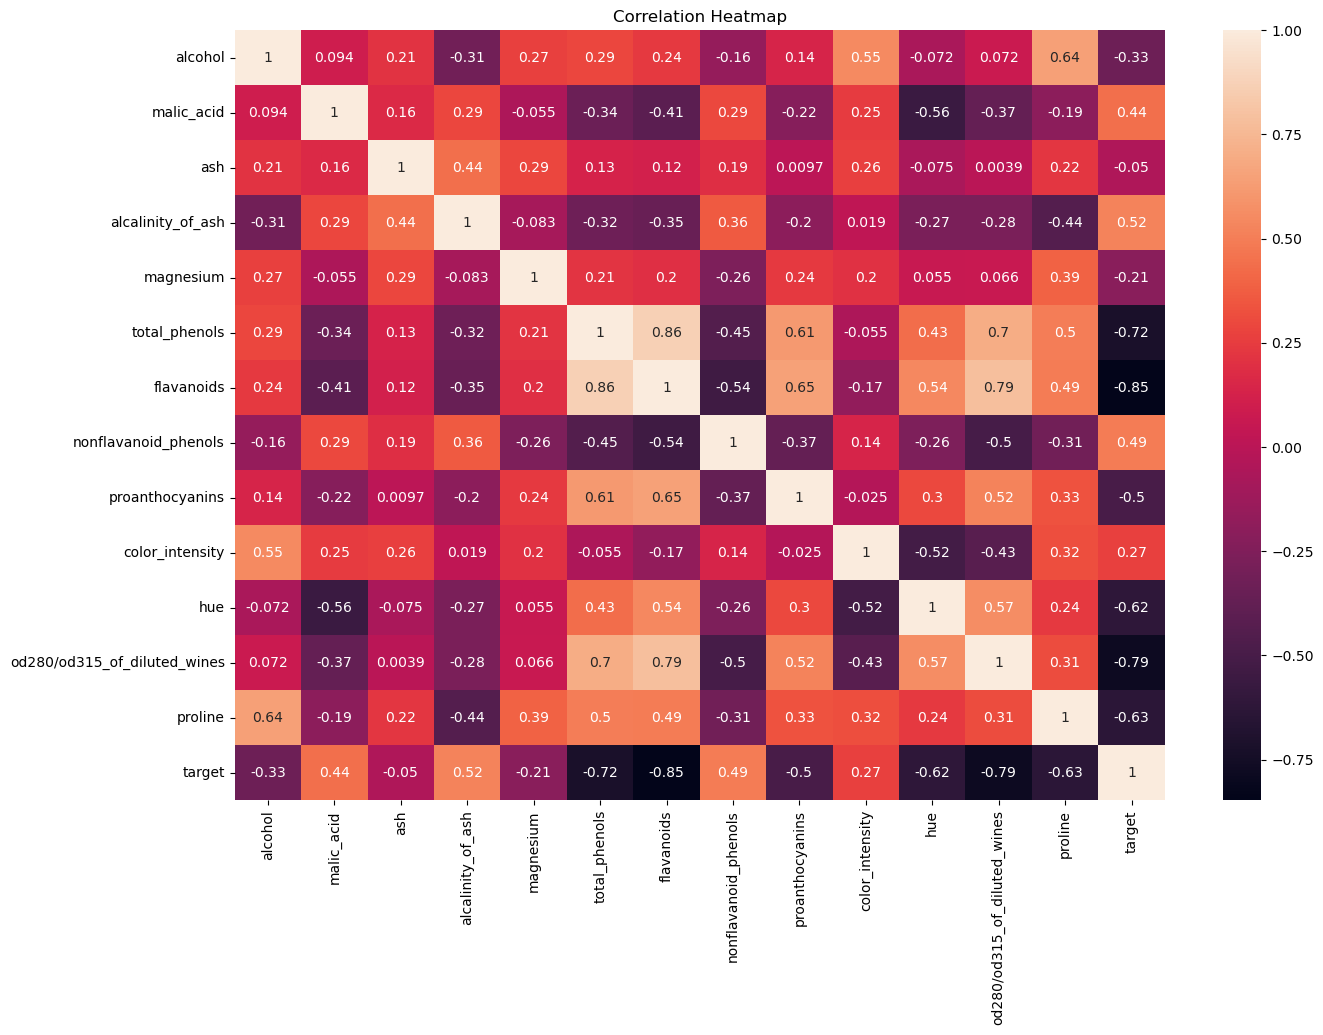

In [24]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 xticklabels=corr_matrix.columns.values,
                 yticklabels=corr_matrix.columns.values,
                 annot=True)
ax.set(title='Correlation Heatmap');

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

**Note to myself:**

Without the standardization, PCA might place more weight to variables with larger scales, incorrectly attributing more importance to them.

In [31]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

**Note to myself:**

In the context of computing the covariance matrix using np.cov, the transposition of scaled_X_train is performed to ensure that the covariance is calculated correctly between the features.

scaled_X_train is typically a 2D NumPy array where rows represent individual samples and columns represent features.
To compute the covariance matrix of the features, each feature should be treated as a variable.
When we pass scaled_X_train to np.cov, it expects the data to be organized such that each row is a variable and each column is an observation. This is the opposite of the typical organization in machine learning datasets, where each column is a variable (feature) and each row is an observation (sample).

Therefore, we transpose scaled_X_train to convert the array from shape (n_samples, n_features) to (n_features, n_samples). This way, each row in the transposed array represents a feature, and each column represents an observation, allowing np.cov to compute the covariance between the features correctly.

In [33]:
covariance_matrix = np.cov(scaled_X_train.T)

In [34]:
covariance_matrix

array([[ 1.0070922 ,  0.10158986,  0.26809509, -0.27516974,  0.23703425,
         0.31671433,  0.27851441, -0.10086553,  0.1305509 ,  0.57003979,
        -0.06801958,  0.05747774,  0.62420905],
       [ 0.10158986,  1.0070922 ,  0.17469631,  0.26867072, -0.03184697,
        -0.32482824, -0.42013761,  0.33304303, -0.22082499,  0.30464878,
        -0.54532022, -0.39388534, -0.18750673],
       [ 0.26809509,  0.17469631,  1.0070922 ,  0.44913101,  0.20279733,
         0.16173403,  0.09405082,  0.15934325,  0.01757216,  0.26297426,
        -0.09527385, -0.01162687,  0.19229708],
       [-0.27516974,  0.26867072,  0.44913101,  1.0070922 , -0.10161795,
        -0.32802847, -0.4026876 ,  0.38895703, -0.21705802,  0.01275967,
        -0.25428449, -0.30031831, -0.43572181],
       [ 0.23703425, -0.03184697,  0.20279733, -0.10161795,  1.0070922 ,
         0.18356106,  0.16698341, -0.31275131,  0.26207895,  0.15237759,
         0.04270468,  0.03007895,  0.34142812],
       [ 0.31671433, -0.324828

**Note to myself:**

Eigenvectors provide the direction of variance. Eigenvalues are the coefficients of the eigenvectors; these denote the importance of this directional data. Therefore, a high eigenvalue means that the corresponding eigenvector is more critical. Since principal components represent the directions of maximum variance in the data, they are also the eigenvectors of the covariance matrix.

Now we will compute the eigenvalues and eigenvectors of the covariance matrix. High eigenvalue means that PC is better, because it explains more variation.  

More eigenvalue  =  more explained variance 

In [36]:
eigen_vals, eigen_vecs = np.linalg.eig(covariance_matrix)

In [42]:
eigen_vals = np.sort(eigen_vals)[::-1]
eigen_vals

array([4.82894083, 2.52920254, 1.40778607, 0.97170248, 0.81772614,
       0.64269609, 0.53904343, 0.32677915, 0.30227988, 0.24405475,
       0.22672631, 0.16401706, 0.09124383])

In [49]:
total_variation = sum(eigen_vals)

percentages = [i / total_variation for i in eigen_vals]
percentages

[0.36884109294857864,
 0.19318394297415245,
 0.10752862207975991,
 0.07421996186682663,
 0.062459038964630745,
 0.04909000492808272,
 0.04117287328777518,
 0.024959837570992464,
 0.02308854978527099,
 0.018641235175096475,
 0.017317664843616593,
 0.0125278470458901,
 0.0069693285293273505]

**Now visualize** 

In [50]:
percentages = [i * 100 for i in percentages]

In [51]:
percentages

[36.884109294857865,
 19.318394297415246,
 10.75286220797599,
 7.421996186682662,
 6.245903896463075,
 4.909000492808272,
 4.117287328777517,
 2.4959837570992462,
 2.308854978527099,
 1.8641235175096476,
 1.7317664843616594,
 1.2527847045890101,
 0.6969328529327351]

**Note to myself:**

Here, we're looking for the number of components that explain most of the variance in the data. We might want to choose the number of components that explain 80-90% of the variation to ensure that you're capturing the most information from the initial data set. By choosing five components, 83.6% of the variance would be explained from the initial data set.

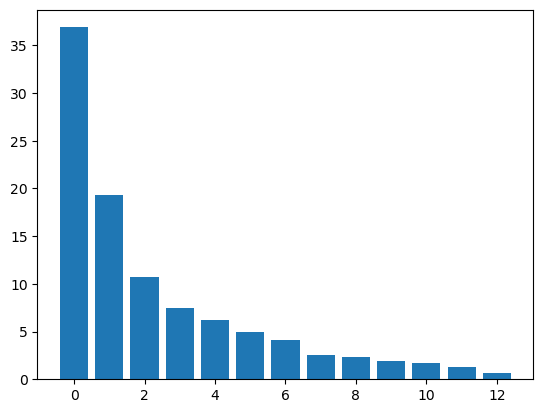

In [55]:
plt.bar(range(len(percentages)), height = percentages);

# Scree Plot

Text(0.5, 1.0, 'Scree Plot')

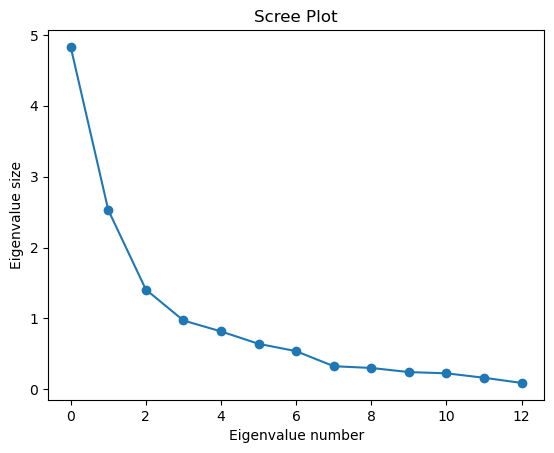

In [57]:
pca = PCA()
pca.fit_transform(scaled_X_train)
explained_variance = pca.explained_variance_ratio_
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

In [59]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_X_train)
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

pca_df.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_train = pd.DataFrame(y_train)
final_pca_df = pca_df
final_pca_df['target'] = y_train

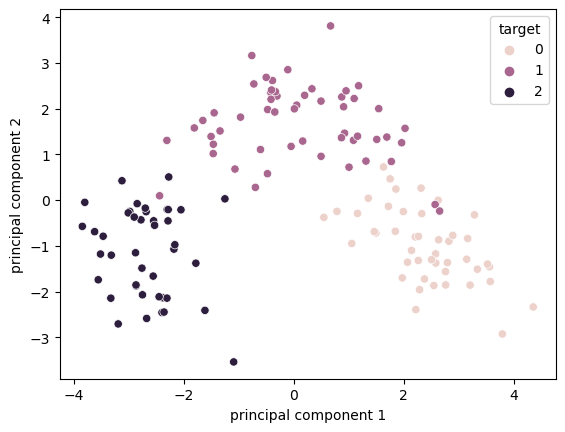

In [60]:
ax = sns.scatterplot(x =final_pca_df.iloc[:,0], y = final_pca_df.iloc[:,1],
hue = 'target',
data=final_pca_df,
legend=True)
plt.show()